1. [Data exploration](#data_exploration)
2. [Events per user](#events_per_user)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
users = pd.read_csv('timeseries_users.csv')
users.head()

,age,gender,user_id
0,51,f,0
1,49,f,1
2,35,m,2
3,63,m,3
4,27,f,4


In [24]:
events = pd.read_csv('timeseries_events.csv')

events.index = pd.to_datetime(events['event_date'], format='%Y-%m-%d %H:%M:%S')
del events['event_date']
events.tail()


,user_id
event_date,
2015-02-24,96
2015-02-08,96
2015-04-06,96
2015-04-08,96
2015-03-23,96


<a id='data_exploration'></a>
## Data exploration

In [4]:
users.describe()

,age,user_id
count,96.000000,96.000000
mean,41.635417,55.250000
std,10.205385,48.984423
min,24.000000,0.000000
25%,33.000000,23.750000
50%,41.000000,47.500000
75%,51.000000,71.250000
max,63.000000,227.000000


User's age mean is from 24 to 63 years old, with a mean of 41 years old.

In [8]:
# 2. Check for NaNs:
print(users.isnull().values.any())
print(events.isnull().values.any())

False
False


In [18]:
# 3. Check for duplicated entries
users_duplicated = users[users.duplicated() == True ]
print('Users: duplicated entries {}'.format(len(users_duplicated)))
events_duplicated = events[events.duplicated() == True ]
print('Events: duplicated entries {}'.format(len(events_duplicated)))

users: duplicated entries 0
Events: duplicated entries 17418


Many duplicated entries are found in the events dataset.   
We could decide to drop them if needed. Here I keep them because I don't know if duplicates are valid entries of this particular dataset.   

<a id='events_per_user'></a>
## Events per user

Plot a histogram of total number of events per user for all male users who are 30+ years old.

In [61]:
# 1. count all events for each user:
events_per_user = events.groupby('user_id').size()
events_per_user.head()

# Select only 30+ male users:
for user_id in events_per_user.index:
    if user_id in users['user_id'].values:
        user = users[ users['user_id'] ==user_id]
        age = user['age'].values[0]
        gender = user['gender'].values[0]
    
        if ( age < 30 ) or (gender == 'f'):
            del events_per_user[user_id]
    else:
        del events_per_user[user_id]


97
22


In [71]:
print(type(events_per_user))
events_per_user.values

<class 'pandas.core.series.Series'>


array([ 126,   65, 1705,  147,  254,  129,  271,   51,  391,   10,  758,
        473,  208,   17,  224,  100,   95,  123,  349,   41, 1947,  278])

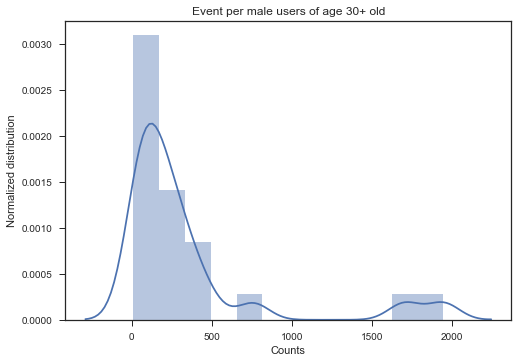

In [82]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
ax = sns.distplot(events_per_user.values)

ax.set_title('Event per male users of age 30+ old')
ax.set_ylabel('Normalized distribution')
ax.set_xlabel('Counts')